In [1]:
# Based on 
# - https://github.com/PLN-FaMAF/Bias-in-word-embeddings/blob/main/main_tutorial_bias_word_embedding.ipynb
# - Uses paper: https://papers.nips.cc/paper/2016/hash/a486cd07e4ac3d270571622f4f316ec5-Abstract.html

In [2]:
# Install if needed
# %pip install --user responsibly

In [4]:
# Do import

import responsibly

# Check version - '0.1.3'
responsibly.__version__


'0.1.3'

In [5]:
# Directives
import warnings
warnings.filterwarnings('ignore')


In [6]:
# A small embedding
from responsibly.we import load_w2v_small

w2v_small = load_w2v_small()


In [7]:
# dataset vocabulary size

len(w2v_small.vocab)

26423

In [8]:
# get the vector of the word "river"
print('river =', w2v_small['river'])


river = [ 2.66271e-03  5.78410e-02  2.86095e-02  2.30120e-02  3.77832e-02
 -2.92315e-02 -4.78898e-02 -2.89205e-02  8.20969e-02  1.00580e-03
  7.71213e-02 -2.33230e-02  1.95913e-02  6.84141e-03 -5.94736e-03
 -1.00133e-01 -1.44797e-03 -4.10484e-02  1.23903e-03 -3.63838e-02
 -4.22923e-02  1.39938e-02 -2.05242e-02 -1.33718e-02  1.05731e-01
 -1.13194e-01 -5.93958e-02 -1.99023e-02  3.62284e-02 -5.16215e-02
 -6.68592e-02  8.89383e-02 -3.70058e-02  1.76477e-02 -8.14749e-02
 -5.25544e-02  2.06797e-02 -4.35362e-03 -1.15837e-02 -3.06308e-02
 -1.70413e-01  1.26722e-02  7.30787e-02 -2.47224e-02 -9.08041e-02
 -1.15682e-01 -1.77255e-02  4.07375e-02 -1.53154e-02  7.52555e-02
  9.39139e-02 -1.79587e-02  2.62772e-02 -5.28654e-02  2.72101e-03
 -6.45269e-03  2.64327e-03  2.68992e-02  1.03865e-01  5.69081e-02
  6.09507e-02 -8.59063e-03 -8.94047e-04 -1.62483e-02  2.82985e-02
  6.06397e-02 -2.65882e-02 -1.48490e-02 -3.65393e-02 -7.74323e-02
 -3.98045e-02 -4.50911e-02  6.62372e-02 -4.29143e-02 -3.23412e-02
 -

In [9]:
# Cosine similarity between strings

w2v_small['cat'] @ w2v_small['finance']


-0.037760377

In [10]:
# Cosine similarity between strings

w2v_small['fiscal'] @ w2v_small['finance']

0.26511097

In [11]:
# Similarity operation
w2v_small.most_similar('flower', topn=5)


[('floral', 0.7493642568588257),
 ('flowers', 0.7488502860069275),
 ('roses', 0.6977386474609375),
 ('blooms', 0.6554170846939087),
 ('blossoms', 0.6527378559112549)]

In [12]:
# Interesting capability
w2v_small.doesnt_match('hairdresser nurse man woman housekeeper personal_trainer flower'.split())

'flower'

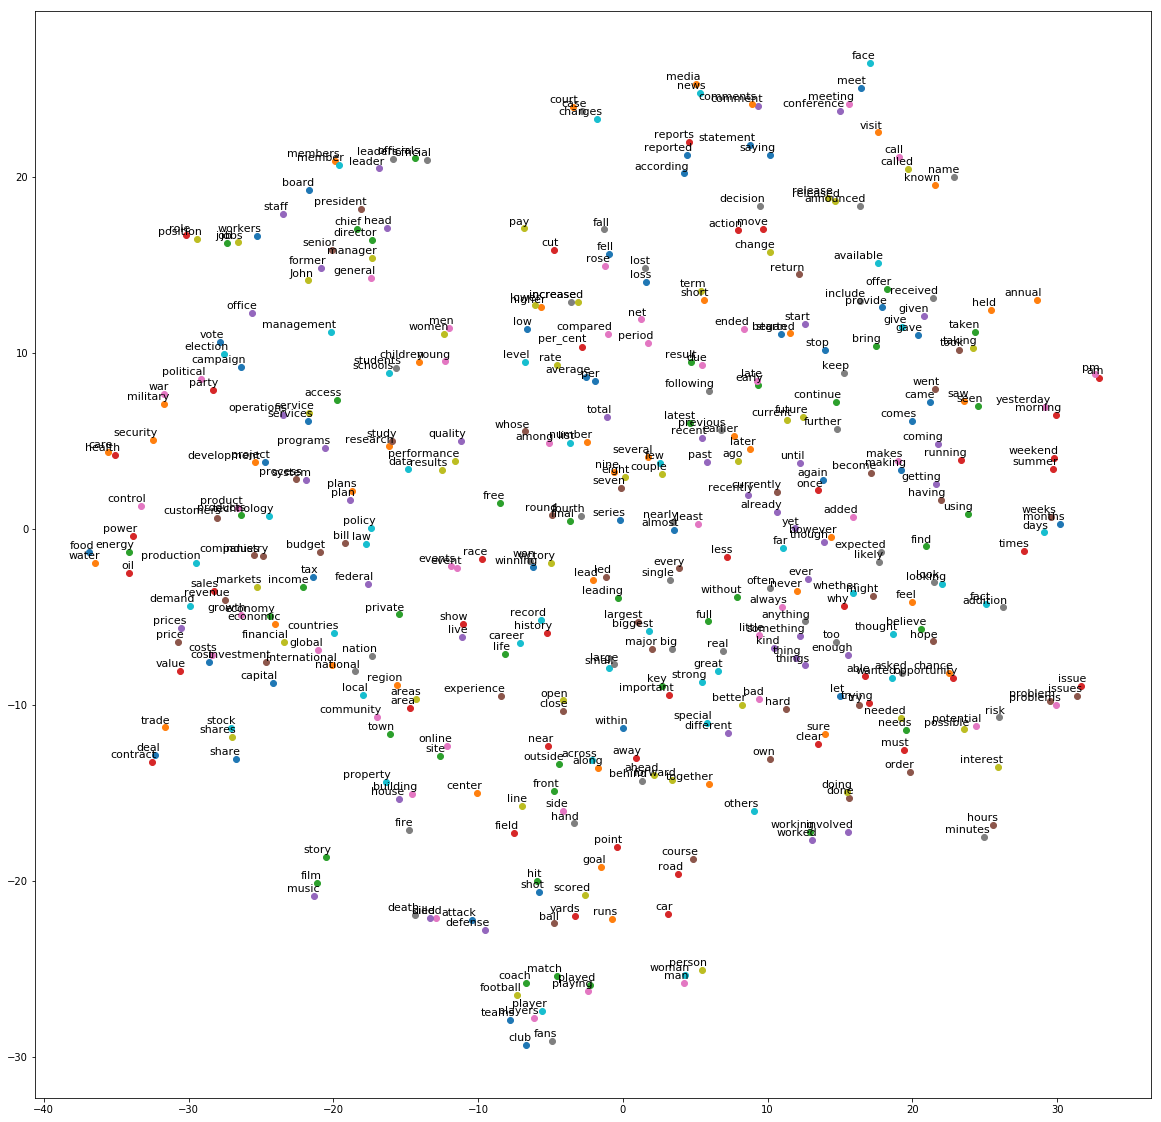

In [13]:
# Plotting common words
from sklearn.manifold import TSNE
from matplotlib import pylab as plt

# take the most common words in the corpus between 200 and 600
words = [word for word in w2v_small.index2word[200:600]]

# convert the words to vectors
embeddings = [w2v_small[word] for word in words]

# perform T-SNE
words_embedded = TSNE(n_components=2).fit_transform(embeddings)

# ... and visualize!
plt.figure(figsize=(20, 20))
for i, label in enumerate(words):
    x, y = words_embedded[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', size=11)
plt.show()

In [14]:
# small is to smaller as good is to what?
w2v_small.most_similar(positive=['good', 'smaller'], negative=['small'], topn=2)


[('better', 0.7270160913467407), ('stronger', 0.5597214698791504)]

In [15]:
# Analogies: she is to he as sister is to what?
w2v_small.most_similar(positive=['sister', 'he'], negative=['she'], topn=5)

[('brother', 0.7627110481262207),
 ('younger_brother', 0.685613214969635),
 ('cousin', 0.6685015559196472),
 ('uncle', 0.6580698490142822),
 ('nephew', 0.65260249376297)]

In [16]:
# Analogies: she is to he as sister is to what?
w2v_small.most_similar(positive=['doctor', 'she'], negative=['he'], topn=4)


[('nurse', 0.6588720083236694),
 ('midwife', 0.6002784371376038),
 ('pediatrician', 0.5921323895454407),
 ('dermatologist', 0.5582228899002075)]

In [17]:
# Handy functions

from numpy.linalg import norm

gender_direction = w2v_small['she'] - w2v_small['he']

gender_direction /= norm(gender_direction)



In [18]:
# the @ operator returns the cosine similarity of 2 normalized vectors
gender_direction @ w2v_small['architect']

-0.16785556

In [19]:
# the @ operator returns the cosine similarity of 2 normalized vectors
gender_direction @ w2v_small['nurse']

0.28085965

In [ ]:
# The note book does many more examples and a way to mitigate bias.